# Project_Dev_IA:  Spam Classifier

Prepared by: Tesfabirhan REDIE

## Libraries

In [34]:
#Libraries

#dataset
import pandas as pd
import numpy as np

#plotting
import plotly.express as px

# for Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest

#Grid_CV
from os import path 
from PIL import Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.utils.validation import check_is_fitted

#Pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

#pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

## Raw Data

In [35]:
#Loading spam data, encoding using ISO 8859-15 is applied to standardize the data input

raw_data = pd.read_csv("/home/tess/Documents/Project_spam_classifier/spam.csv", encoding = 'ISO 8859-15')

## Data Set

In [36]:
#Data Set

raw_data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
#data shape
raw_data.shape

(5572, 5)

In [38]:
#Data Informations

print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [39]:
#data description

raw_data.describe().round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


## Data Preprocessing

### Explanatory Data Analysis(EDA)

#### Dropping & Rename column(s)

In [40]:
#Drop insignifican columns, and create a new data frame, df1

df1 = raw_data.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"])

#Renaming the new data as "df1", first modification

df1.columns = ['Label','Text']

#### Missing values

In [41]:
#Checking missing values

df1.isnull().sum()

Label    0
Text     0
dtype: int64

#### Drop duplicates

In [42]:
#Drop duplicates and remove if there is any

df1.drop_duplicates(inplace = True)
df1.shape

(5169, 2)

#### Investigate all the elements within each feature

##### Unique Value investigation

In [43]:
#Frquency of spam and ham values description

df1.groupby('Label').describe()

Text                                                               
      count unique                                                top freq
Label                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

##### Index text length

In [44]:
#Text lenth in descending order, new dataframe

df1['length'] = df1['Text'].str.len()
df1.sort_values('length', ascending=False, inplace=True)
df1.head(5)

,Label,Text,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2157,ham,Sad story of a Man - Last week was my b'day. M...,588


In [45]:
(df1).groupby('Label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
ham    4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam    653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

### Data Visualization

In [46]:
#Libraries for plotting

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

##### Unique values Count

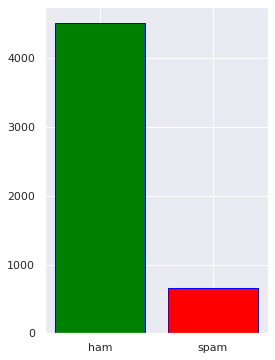

In [47]:
#Frequency bar graph

plt.figure(figsize = (4, 6))

x_axis = df1['Label'].unique()
y_axis = df1['Label'].value_counts()

plt.bar(x_axis, y_axis, color = ['green', 'red'], edgecolor = 'blue')
plt.show()

#### Text length visualization

##### Select range, Text_Length, in this case, <200 is choosen based on the description of the data

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

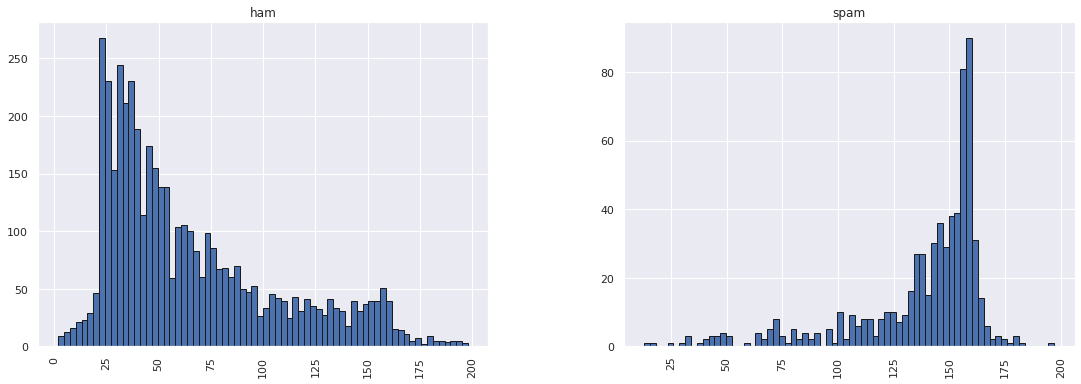

In [48]:
# define length size, length value selected based on mximum spam size, exemple: len<200

df2 = df1[df1['length']<200]

#Histogram plot

sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
df2.hist(column = 'length', by = 'Label', bins = 70, edgecolor = 'k')

Text(0.5, 1.0, 'Spam data Text length')

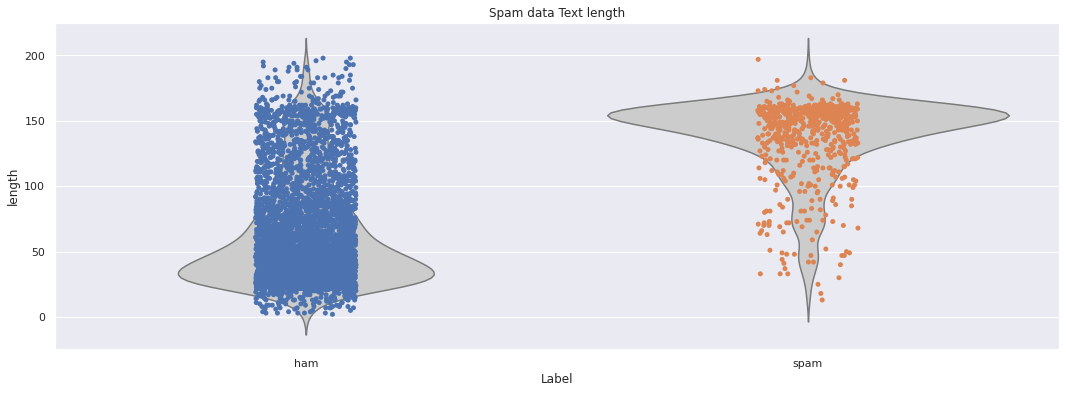

In [49]:
#Mean distribution grapgh, violin plot

ax = sns.violinplot(x =df2['Label'], y =df2['length'], data=df2, inner=None, color=".8")

ax = sns.stripplot(x =df2['Label'], y =df2['length'], data=df2)

ax.set_title('Spam data Text length')

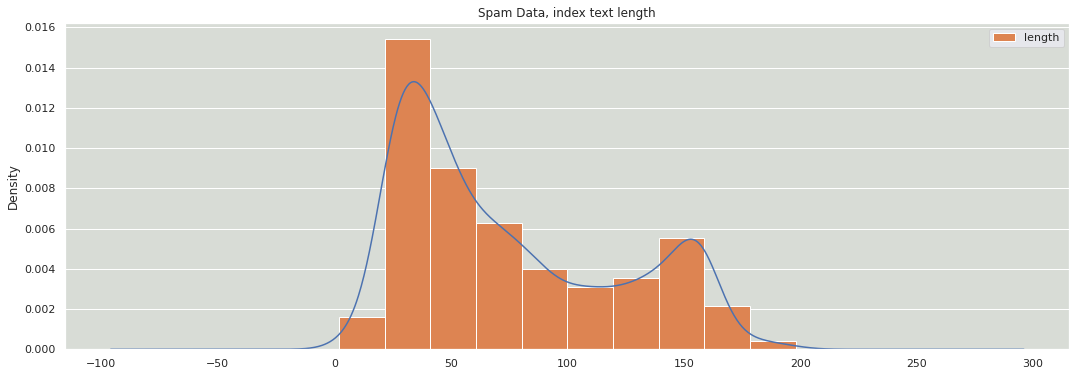

In [50]:
#Histogram plot
fig, ax = plt.subplots()
df2.plot.kde(ax=ax, legend=False, title='Spam Data, index text length')
df2.plot.hist(density=True, ax=ax)
ax.set_ylabel('Density')
ax.grid(axis='x')
ax.set_facecolor('#d8dcd6')

## Features Engineering

In [51]:
#libraries for text processing
import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
import string 
import spacy
from nltk.corpus import stopwords
import collections
import requests
import re
from collections import Counter

#### lowerization of text

In [52]:
df1 = df1.applymap(lambda s: s.lower() if type(s) == str else s)
#df1.head()

#### Features extraction

##### Encoding the label column, spam=1, ham=0

In [53]:
# creating numerical repersentation of category - OneHotEncoding

df1['labels'] = df1['Label'].apply(lambda x:1 if x=='spam' else 0)

##### phone numbers

In [54]:
#Digits 3, commonly used for text messaging

dx1 = df1['Text'].str.contains("\d{3}")
df1['dig3'] = 1*dx1
#print(df1['dig3'])

In [55]:
#Digits 5

dx2 = df1['Text'].str.contains("\d{5}")
df1['dig5'] = 1*dx2
#df1['dig5'].head()

In [56]:
#Digits 10

dx3 = df1['Text'].str.contains(('\d{11}'))
df1['dig10'] = 1*dx3
#df1['dig5'].head()

In [57]:
#Digits 10

dx4 = df1['Text'].str.contains('\d{3} \d{3} \d{4}')
df1['phone_unique'] = 1*dx4
#df1['dig5'].head()

##### asking for money, `"[^a-z].*£(\d+)"`

In [58]:
money_pound = df1['Text'].str.contains("£\d+")
df1['money_pound'] = 1*money_pound

In [59]:
money_dollar = df1['Text'].str.contains("\$\d+")
df1['money_dollar'] = 1*money_dollar

##### Mixed Special characters commonly visible

In [60]:
special = df1['Text'].str.contains('&lt;#&gt;')
df1['specials'] = 1*special

##### emails `[\w._%+-]+@[\w.-]+\.[a-zA-Z]{2,4}` 

In [61]:
emails = df1['Text'].str.contains("[\w._%+-]+@[\w.-]+\.[a-zA-Z]{2,4}")
df1['emails'] = 1*emails

##### Dates `(\d+\s\w+\s\d+)`

In [62]:
#date format (\d+\s\w+\s\d+)

dates1 = df1['Text'].str.contains("\d+\s\w+\s\d+")
df1['dates1'] = 1*dates1

In [63]:
dates2 = df1['Text'].str.contains("\d+/\d+/\d")
df1['dates1'] = 1*dates2

### Spam Text Processing

In [66]:
# spam messages

spam1 = df1.loc[df1['Label']=='spam', :]
spam1.shape

(653, 13)

##### Remove punctuations

In [67]:
#Download the stopwords package

nltk.download('stopwords')

#download punctuation package

nltk.download('punkt')

#download wordnet package

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/tess/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tess/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tess/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
punctuations = string.punctuation

In [69]:
#defining the function to remove punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punctuations])
    return punctuationfree

#storing the puntuation free text

spam1['Text_nonpunc'] = spam1['Text'].apply(lambda x:remove_punctuation(x))
#spam1['Text_nonpunc']

/tmp/ipykernel_36015/2990229251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam1['Text_nonpunc'] = spam1['Text'].apply(lambda x:remove_punctuation(x))


Remove any single digit or alphabets or characters

##### Removing stop words from the spam text

In [70]:
#defining the function to remove stopwords from tokenized text

def remove_stopwords(txt):
    
    stoplist = nltk.corpus.stopwords.words('english')

    output =' '.join([word for word in txt.split() if word not in stoplist])
    return output

##applying the stopword function

spam1['clean_text'] = spam1['Text_nonpunc'].apply(lambda x:remove_stopwords(x))
clean_spam = spam1['clean_text']
#spam1['clean_text'].head()

/tmp/ipykernel_36015/806295615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam1['clean_text'] = spam1['Text_nonpunc'].apply(lambda x:remove_stopwords(x))


In [71]:
#split words to columns

splitwords = [nltk.word_tokenize(str(sentence)) for sentence in clean_spam]
#splitwords

### Word Cloud vizualization

In [72]:
#Libraries

import matplotlib.pyplot as plt
from io import StringIO
import matplotlib as mpl 
from matplotlib.pyplot import figure
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [73]:
#bank of words, bows

bows = [nltk.word_tokenize(str(word)) for word in spam1['clean_text']]
bows[0:2], #example for row[index = ['':'']

([['hi',
   'mandy',
   'sullivan',
   'calling',
   'hotmix',
   'fmyou',
   'chosen',
   'receive',
   'å£500000',
   'easter',
   'prize',
   'drawplease',
   'telephone',
   '09041940223',
   'claim',
   '290305',
   'prize',
   'transferred',
   'someone',
   'else'],
  ['thanks',
   'ringtone',
   'order',
   'reference',
   'number',
   'x49',
   'mobile',
   'charged',
   '450',
   'tone',
   'arrive',
   'please',
   'call',
   'customer',
   'services',
   '09065989182',
   'colourredtextcolourtxtstar']],)

In [74]:
counts = [len(words) for words in bows]

In [75]:
char_length =spam1['clean_text'].apply(len)

In [76]:
df = clean_spam
column = spam1['clean_text']
numWords = counts

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in spam1['clean_text'] if isinstance(x, str)]
                       for z in y]
    
    word_count_dict = dict(Counter(topic_words))
    
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=numWords, width=1200,height=700,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Source: <a href="https://www.kaggle.com/paultimothymooney/most-common-words-on-kaggle-wordcloud-bargraph">Most Common Words on Kaggle (WordCloud + BarGraph)</a>

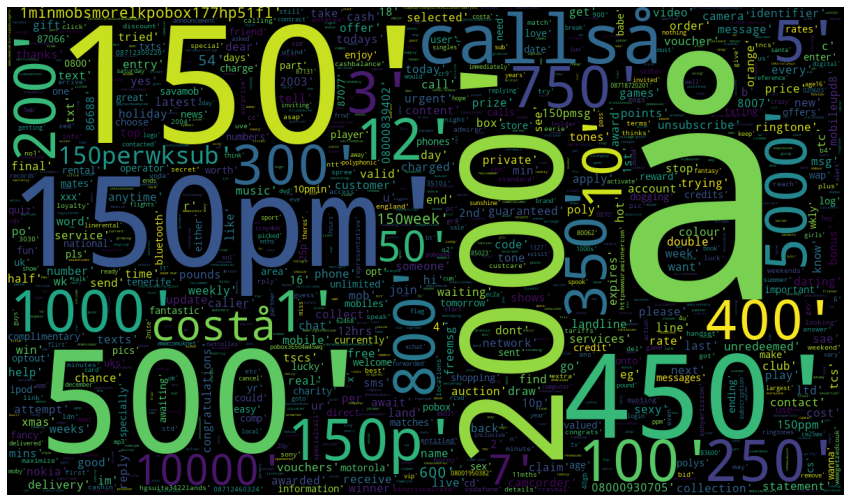

In [77]:
#spam word cloud, 1000 words

plt.figure(figsize=(15,15))
wordCloudFunction(clean_spam,'title',1000)

In [78]:
from collections import Counter

df = clean_spam
column = spam1['clean_text']

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                   [x.split() for x in spam1['clean_text'] if isinstance(x, str)]
                    for z in y]
    
    word_count_dict = dict(Counter(topic_words))
    
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])]) #30 top most common words
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

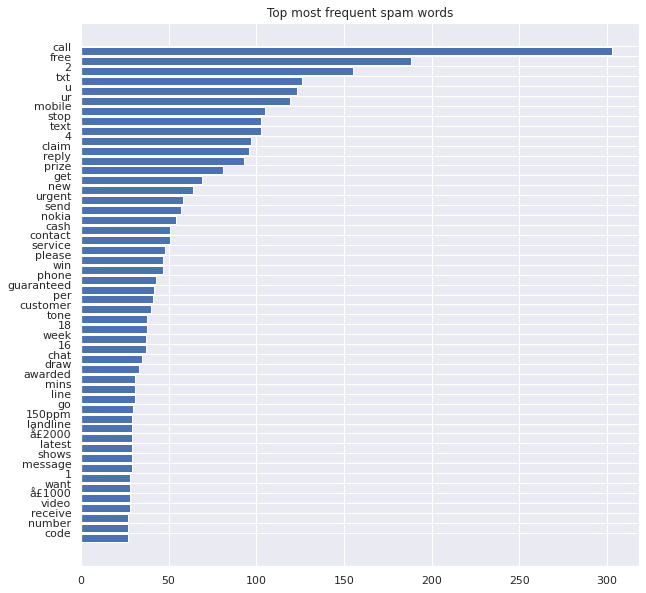

In [79]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(clean_spam,'title',"Top most frequent spam words")

### Features creation - top 20 most frequent words

In [80]:
df1['call'] = df1['Text'].apply(lambda x: 1 if r"call" in x else 0 )

In [81]:
df1['free'] = df1['Text'].apply(lambda x: 1 if r"free" in x else 0 )

In [82]:
df1['txt'] = df1['Text'].apply(lambda x: 1 if r"txt" in x else 0 )

In [83]:
df1['text'] = df1['Text'].apply(lambda x: 1 if r"text" in x else 0 )

In [84]:
df1['urgent'] = df1['Text'].apply(lambda x: 1 if r"urgent" in x else 0 )

In [85]:
df1['new'] = df1['Text'].apply(lambda x: 1 if r"new" in x else 0 )

In [86]:
df1['reply'] = df1['Text'].apply(lambda x: 1 if r"reply" in x else 0 )

In [87]:
df1['prize'] = df1['Text'].apply(lambda x: 1 if r"prize" in x else 0 )

In [88]:
df1['get'] = df1['Text'].apply(lambda x: 1 if r"get" in x else 0 )

In [89]:
df1['claim'] = df1['Text'].apply(lambda x: 1 if r"claim" in x else 0 )

In [90]:
df1['call'] = df1['Text'].apply(lambda x: 1 if r"call" in x else 0 )

In [91]:
df1['contact'] = df1['Text'].apply(lambda x: 1 if r"contact" in x else 0 )

In [92]:
df1['win'] = df1['Text'].apply(lambda x: 1 if r"win" in x else 0 )

In [93]:
df1['cash'] = df1['Text'].apply(lambda x: 1 if r"cash" in x else 0)

In [94]:
df1['phone'] = df1['Text'].apply(lambda x: 1 if r"phone" in x else 0 )

In [95]:
df1['service'] = df1['Text'].apply(lambda x: 1 if r"service" in x else 0 )

In [96]:
df1['guaranteed'] = df1['Text'].apply(lambda x: 1 if r"guaranteed" in x else 0 )

In [97]:
df1['awarded'] = df1['Text'].apply(lambda x: 1 if r"awarded" in x else 0 )

In [103]:
df1.shape

(5169, 30)

## Preparation of Input Data

### Creation of a balanced Data

### Filtering Spam data

In [104]:
# creating new dataframe as df_ham , df_spam

df_spam = df1.loc[df1['Label']=='spam', :]


print("spam Dataset Shape:", df_spam.shape)

spam Dataset Shape: (653, 30)


##### 4.1.2 Filtering Ham data

In [105]:
df_ham = df1.loc[df1['Label']=='ham', :]

print("Ham Dataset Shape:", df_ham.shape)

Ham Dataset Shape: (4516, 30)


#### 4.3 Balancing Data, Downsampling

As there could be bias in the dataset of the given data sample, due to major difference, <a href="https://www.projectpro.io/recipes/deal-with-imbalance-classes-with-downsampling-in-python">downsampling</a> technique is applied. Downsampling is performed to reduce the number of samples that is expected to have a bias class. This arises mainly because of high differences between the sample classes. Hence, downsampling is a technique where the majority class is downsampled to match minority class. 

It is calculated by `minority(spam) values/(majority(ham) values*100%`

#### 4.3.1 Percentage of the target data, spam

In [106]:
# Percentage of data to be balanced- spam by downsampling

#ham_data and spam_data shape[] are used for calculating Percentage
 
Perc_spam = (df_spam.shape[0]/df_ham.shape[0])*100, #Perc_spam = Percentage of spam, in %
print('Spam Percentage:', Perc_spam)

Spam Percentage: (14.45969884853853,)


In [107]:
# downsampling ham dataset - Equal to the '%' of spam

df_ham_downsampled = df_ham.sample(df_spam.shape[0])

In [108]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
#50-50

df = pd.concat([df_spam , df_ham_downsampled]) #Balanced Data df_balanced  = df

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1733 to 2023
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         1306 non-null   object
 1   Text          1306 non-null   object
 2   length        1306 non-null   int64 
 3   labels        1306 non-null   int64 
 4   dig3          1306 non-null   int64 
 5   dig5          1306 non-null   int64 
 6   dig10         1306 non-null   int64 
 7   phone_unique  1306 non-null   int64 
 8   money_pound   1306 non-null   int64 
 9   money_dollar  1306 non-null   int64 
 10  specials      1306 non-null   int64 
 11  emails        1306 non-null   int64 
 12  dates1        1306 non-null   int64 
 13  call          1306 non-null   int64 
 14  free          1306 non-null   int64 
 15  txt           1306 non-null   int64 
 16  text          1306 non-null   int64 
 17  urgent        1306 non-null   int64 
 18  new           1306 non-null   int64 
 19  rep

####  Output Data Visualization

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

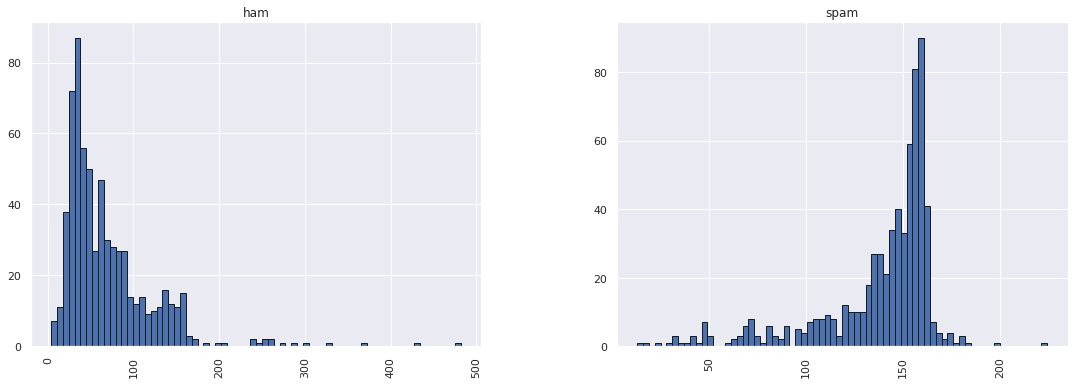

In [110]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize' : (18,6)})
df.hist(column = 'length', by = 'Label', bins = 70, edgecolor = 'k')

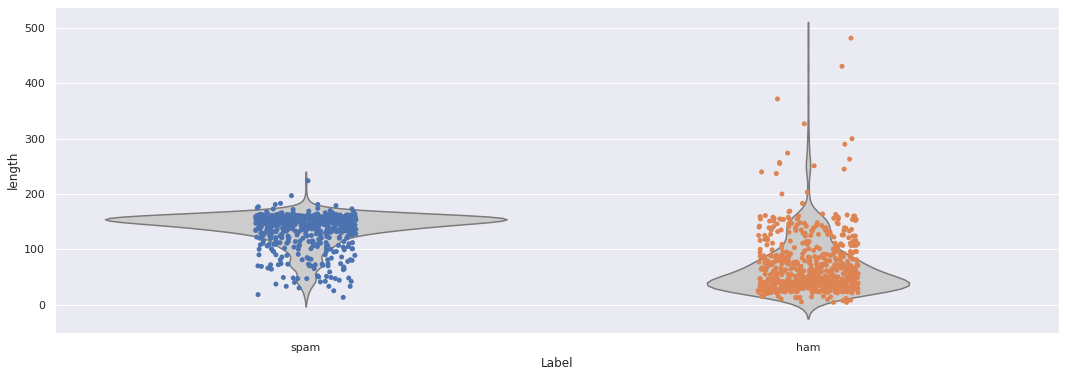

In [111]:
#Visualization after cleaning

ax = sns.violinplot(x = df['Label'], y = df['length'], data = df, inner = None, color=".8")

ax = sns.stripplot(x = df['Label'], y = df['length'], data=df)

<AxesSubplot:>

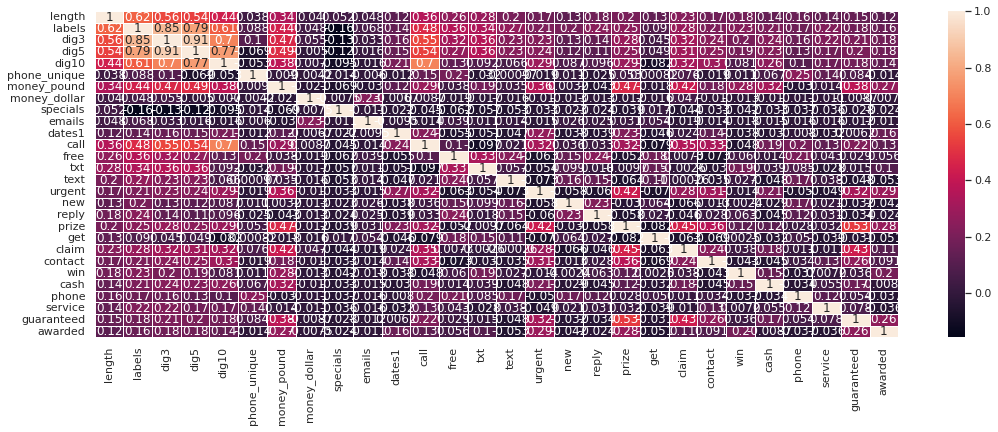

In [112]:
#Correlation of Data

sns.heatmap(df.corr(), annot=True, linewidths=0.5)


## 5. Model Creation

#### Data Initiation

In [115]:
#Data model, tokenized and adjusted data

df.columns

Index(['Label', 'Text', 'length', 'labels', 'dig3', 'dig5', 'dig10',
       'phone_unique', 'money_pound', 'money_dollar', 'specials', 'emails',
       'dates1', 'call', 'free', 'txt', 'text', 'urgent', 'new', 'reply',
       'prize', 'get', 'claim', 'contact', 'win', 'cash', 'phone', 'service',
       'guaranteed', 'awarded'],
      dtype='object')

In [116]:
#df.dtypes

In [117]:
#columns for data model

col = ['length', 'dig3', 'dig5', 'dig10',
       'phone_unique', 'money_pound', 'money_dollar', 'specials', 'emails',
       'dates1', 'txt', 'urgent', 'new', 'reply',
       'prize', 'get', 'claim', 'contact', 'win', 'cash', 'phone', 'service',
       'guaranteed', 'awarded']

In [118]:
# spliting data to features and target group

X = df[col]    #features
y = df['labels']  #Target

####  Encoding and transforming

In [119]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier  

In [120]:
from sklearn.preprocessing import RobustScaler

### Grid search 

In [121]:
# Random Forest Classifier - Grid Search 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.feature_selection import SelectKBest

In [122]:
# train-test split
#features_test_data = 20%(X); target_test_data = 20%(y)

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40, stratify=y) #20% as test set

In [123]:
# Train-Test dataset

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('X_train:', y_test.shape)

X_train: (1044, 24)
X_test: (262, 24)
y_train: (1044,)
X_train: (262,)


In [124]:
#Model => Random Forest Classifier, rfc

rfc = RandomForestClassifier(random_state = 42)

In [125]:
#Hyperparameters

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [126]:
#Grid Search CV

rfc_Grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)

rfc_Grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [127]:
rfc_Grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [129]:
#Model hyperparameters

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=5, criterion='gini')

In [130]:
#Fit

rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=42)

In [131]:
#coding the spam(0), ham(1)

scale = StandardScaler()

In [132]:
#Transformation

col_trans = make_column_transformer(
    (scale,['length', 'dig3', 'dig5', 'dig10',
       'phone_unique', 'money_pound', 'money_dollar', 'specials', 'emails',
       'dates1', 'txt', 'urgent', 'new', 'reply',
       'prize', 'get', 'claim', 'contact', 'win', 'cash', 'phone', 'service',
       'guaranteed', 'awarded']), remainder='passthrough')

#### Pipeline

In [133]:
pipe = Pipeline([
    ('transformer', col_trans),
    ('select', SelectKBest()),
    ('model', rfc1)])

In [134]:
from sklearn import set_config

set_config(display='diagram')
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['length', 'dig3', 'dig5',
                                                   'dig10', 'phone_unique',
                                                   'money_pound',
                                                   'money_dollar', 'specials',
                                                   'emails', 'dates1', 'txt',
                                                   'urgent', 'new', 'reply',
                                                   'prize', 'get', 'claim',
                                                   'contact', 'win', 'cash',
                                                   'phone', 'service',
                                                   'guaranteed',
                                                   'awarded'])])),
                ('select', SelectKBest()),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=42))])

In [135]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['length', 'dig3', 'dig5',
                                                   'dig10', 'phone_unique',
                                                   'money_pound',
                                                   'money_dollar', 'specials',
                                                   'emails', 'dates1', 'txt',
                                                   'urgent', 'new', 'reply',
                                                   'prize', 'get', 'claim',
                                                   'contact', 'win', 'cash',
                                                   'phone', 'service',
                                                   'guaranteed',
                                                   'awarded'])])),
                ('select', SelectKBest()),
                ('model',
                 RandomForestClassifier(max_depth=5, n_estimators=500,
                                        random_state=42))])

### Model Evaluation

In [136]:
model_score = pipe.score(X_train, y_train)
model_score

0.946360153256705

### Metrics Evaluation

In [137]:
#Predict X_test

pred = pipe.predict(X_test)

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9389312977099237


### Matrix confusion

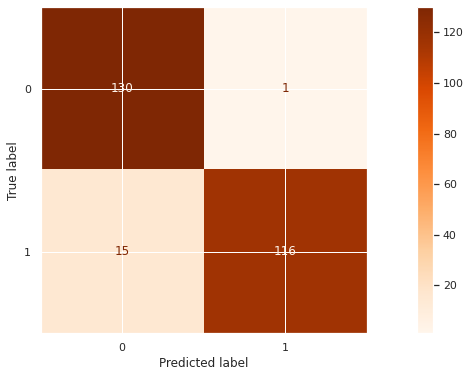

In [138]:
#matrix_confusion diagramme
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Oranges, normalize=None)


In [139]:
#print the matrix confusion
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))

Confusion Matrix: 
 [[130   1]
 [ 15 116]]


#### Evaluation

In [140]:
#Evaluate the model on the training data set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = pipe.predict(X_train)

print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       522
           1       0.99      0.90      0.94       522

    accuracy                           0.95      1044
   macro avg       0.95      0.95      0.95      1044
weighted avg       0.95      0.95      0.95      1044



### Predict spam message

In [141]:
print("SMS message to test")
mss = input()

SMS message to test
Please text me
